In [1]:
import json

In [2]:
import torch

In [3]:
f = open("dataset.json", 'r')

In [4]:
data = json.load(f)

In [5]:
len(data.keys())

340

In [39]:
data

{'ALONE': [[3707,
   3782,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2008_02_01/scene35-camera1.mov'],
  [2890,
   2936,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2008_02_29/scene32-camera1.mov'],
  [3801,
   3830,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2008_05_29b/scene9-camera1.mov'],
  [4065,
   4141,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2008_08_13/scene29-camera1.mov'],
  [1430,
   1498,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2011_06_14_Brady/scene42-camera1.mov'],
  [3186,
   3211,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2011_07_19_Brady/scene83-camera1.mov'],
  [2076,
   2120,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2006_10_10/scene2-camera1.mov'],
  [2431,
   2476,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2007_05_24/scene5-camera1.mov']],
 'BELOW': [[725,
   751,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quic

In [7]:
asdasd = {
    'key' : [a,b,c, None],
    'key2': [a,b,c,d]
    'key3': [a, None,  None, None]
}
[keya, keyb, keyc, ('key2', a), key2b]
3

SyntaxError: invalid syntax (2580954146.py, line 4)

In [8]:
import os
from torchvision.io import read_video

class CustomImageDataset(Dataset):
    def __init__(self, json):
        f = open(json, 'r')
        data = json.load(f)
        
        self.clips = []
        
        self.labels = {}
        total_classes = len(data)
        current_class = 0
        
        for key in data:
            
            one_hot_version = torch.nn.functional.one_hot(torch.tensor([current_class]), num_classes=total_classes)
            self.labels[key] = one_hot_version # make it the next one_hot
            current_class += 1
            
            for value in data[key]:
                self.clips.append((key, value))
        
        
    def __len__(self):
        return len(self.clips)

    def __getitem__(self, idx):
        word, video_data = self.clips[idx]
        # convert the word to a one hot encoding
        label = self.labels[word]
        
        # convert the video data to be the same shape (and load the video)
        frame_start, frame_end, video_url = video_data
        # get the video path
        video_path = "videos/"+ "_".join(video_url.split('/')[-2:]).split('.')[0] + ".mp4"
        # load the video
        r = torchvision.io.read_video(video_path)
        # slice the video
        r = r[frame_start:frame_end]
        # t, h, w, c
        # c, t, h, w
        r = r.permute([3, 0, 1, 2]) 
        # 35 frames
        
        # resize the video
        # transform the video
        return image, label

NameError: name 'Dataset' is not defined

In [12]:
s =  'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2011_07_19_Brady/scene83-camera1.mov'

In [13]:
path = "videos/"+ "_".join(s.split('/')[-2:]).split('.')[0] + ".mp4"

In [14]:
import torchvision


In [51]:
r = torchvision.io.read_video(path, start_pts=.5)

In [56]:
r[0].shape # frame, h, w, c 
# c, frames(some), h, w 

torch.Size([3360, 480, 640, 3])

In [49]:
import matplotlib.pyplot as plt

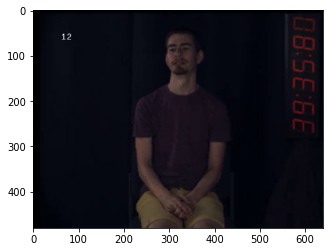

In [50]:
plt.imshow(r[0][0])